In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Preprocess the data

In [22]:
# Load the data but skip the first row

df = pd.read_csv('data/df_Salling_Products.csv' , delimiter=";")
df.head()

,Unnamed: 0,product_id,name,price,link,category
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent/
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent/
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent/
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent/
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent/


In [23]:
# Splitting price into amount and unit
df[['price_amount', 'unit']] = df['price'].str.split('/', expand=True)

# Clean up the 'amount' column, removing any commas and converting to float
df['price_amount'] = df['price_amount'].str.replace(',', '.').str.extract('(\d+.\d+)').astype(float)
df.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent/,2.75,Stk.
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent/,7.25,Stk.
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent/,9.00,Stk.
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent/,2.20,Stk.
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent/,10.00,Kg.


In [24]:
df.describe()

,Unnamed: 0,product_id,price_amount
count,32285.000000,32285.000000,32275.000000
mean,16142.000000,95081.418182,134.526956
std,9320.021057,32105.756833,155.647136
min,0.000000,14287.000000,0.020000
25%,8071.000000,78799.000000,31.950000
50%,16142.000000,102528.000000,85.000000
75%,24213.000000,121124.000000,179.000000
max,32284.000000,133518.000000,999.500000


In [25]:
#remove the / at the end of cells in category column
df['category'] = df['category'].str.replace('/','')
df.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.


In [26]:
#count amount of products in each personlig-pleje category
df['category'].value_counts()

category
personlig-pleje     5741
kolonial            3732
bolig-og-koekken    3500
fritid-og-sport     2793
toej-og-sko         2792
leg                 1991
elektronik          1796
drikkevarer         1700
mejeri-og-koel      1582
slik-og-snacks      1573
husholdning          798
have                 614
broed-og-kager       579
frost                571
dyremad              539
byggemarked          513
baby-og-boern        421
kiosk                375
frugt-og-groent      299
koed-og-fisk         233
biludstyr            143
Name: count, dtype: int64

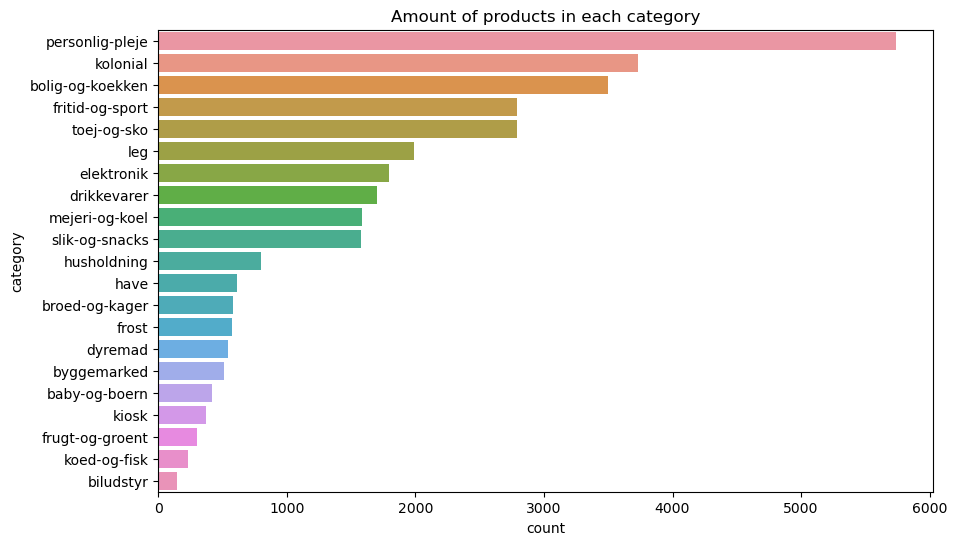

In [6]:
#plot the amount of products in each category on a bar chart y-axis is the product count and x-axis is the category and sort the values
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', order = df['category'].value_counts().index)
plt.title('Amount of products in each category')
plt.show()




In [27]:
#count all nan values in the dataframe
df.isnull().sum()

Unnamed: 0       0
product_id       0
name             0
price            0
link             0
category         0
price_amount    10
unit            16
dtype: int64

In [28]:
df.shape    

(32285, 8)

In [35]:
#print all unique values in the category column
df['category'].value_counts()

category
personlig-pleje     5741
kolonial            3732
bolig-og-koekken    3500
fritid-og-sport     2793
toej-og-sko         2792
leg                 1991
elektronik          1796
drikkevarer         1700
mejeri-og-koel      1582
slik-og-snacks      1573
husholdning          798
have                 614
broed-og-kager       579
frost                571
dyremad              539
byggemarked          513
baby-og-boern        421
kiosk                375
frugt-og-groent      299
koed-og-fisk         233
biludstyr            143
Name: count, dtype: int64

In [30]:

foods = ['frugt-og-groent', 'koed-og-fisk', 'mejeri-og-koel', 'drikkevarer', 'broed-og-kager','kolonial', 'slik-og-snacks', 'frost']
house = ['husholdning', 'personlig-pleje', 'baby-og-boern', 'bolig-og-koekken', 'fritid-og-sport', 'toej-og-sko', 'have', 'leg', 'byggemarked']
other = ['kiosk', 'dyremad','elektronik','biludstyr']

# Map categories to main groups
df['outer_category'] = df['category'].map(lambda x: 'Foods' if x in foods else ('House' if x in house else 'Other'))

df.head()


,Unnamed: 0,product_id,name,price,link,category,price_amount,unit,outer_category
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.,Foods
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.,Foods
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.,Foods
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.,Foods
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.,Foods


In [31]:
#count the amount of products in each main category
df['outer_category'].value_counts()

outer_category
House    19163
Foods    10269
Other     2853
Name: count, dtype: int64

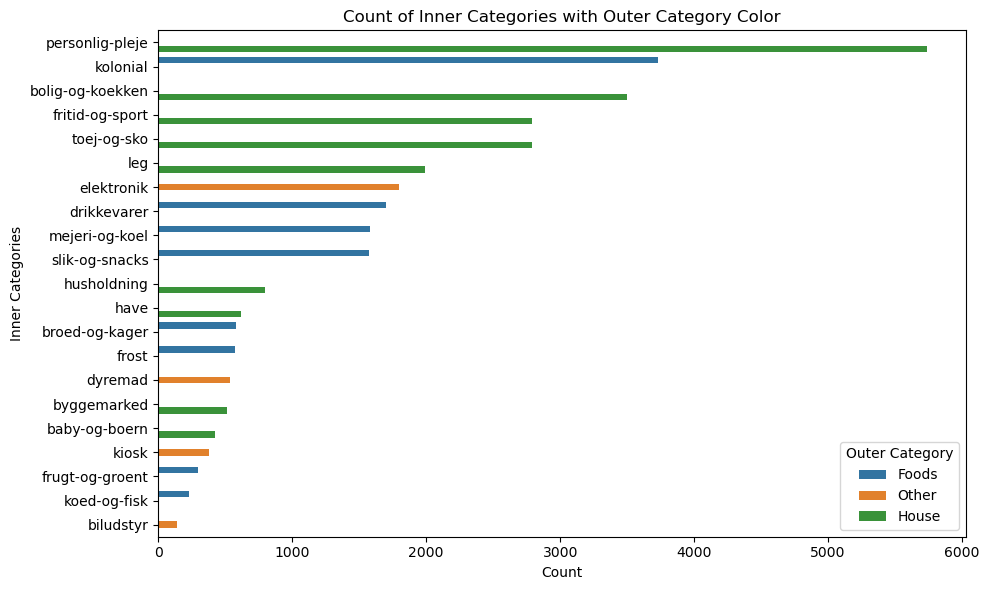

In [54]:

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, hue='outer_category', order=df['category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Inner Categories')
plt.title('Count of Inner Categories with Outer Category Color')
plt.legend(title='Outer Category')
plt.tight_layout()
plt.show()
